<a href="https://colab.research.google.com/github/RPAD676Spring2025/lab-3-Masielsalazar/blob/main/Visualizing_the_Racial_Wage_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing the Racial Wage Gap

**What is the question, problem, or topic you’re exploring? How does it relate to the “public good”? Why does this matter?**

This project aims to compare wages across different races and measure those wage disparities between white and non-white groups. Racial disparities in wages reflects systemic inequality, impacting the public's financial security, access to opporunities, and economic mobility.

**Description of your dataset and why you chose it. Link to data source (and license if applicable). Summary of key variables, size, and any notable features**

This dataset uses Census data, specifically from the *U.S. Census Bureau’s Quarterly Workforce Indicators (QWI) Explorer*, comparing wage disparities only in New York State (NYS). The data reveals average monthly earnings by race across all NAICS Sectors.

Link to Source:
https://qwiexplorer.ces.census.gov

Link to Excel: [NAICS Sector - Wage Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQojO9mKyILiMvazv0fxIiKDlwXKVTpXNzru634RdXLAMdF9sJpTwgQq-l3BRCnMQ/pubhtml)

Summary of key variables:

*   NAICS Sector: Industry classification
*   Race/Ethnicity:
  *   White
  *   Black or African American
  *   Hispanic or Latino
  *   Asian Alone
  *   American Indian or Alaska Native Alone
  *   Native Hawaiian or Other Pacific Islander Alone
  *   Two or More Race Groups
*   Variable of Interest: Average Monthly Earnings


Key Findings/Results:


*   Finance and Insurance had the largest wage gap for Black and Hispanic workers, each earning over $20,000 less per year than white counterparts.
*   Management and Professional Services sectors consistently showed disparities across multiple racial groups.
*   The sectors with the highest wage gaps varied by group, implicating that there may be no single policy that solves wage inequality for all races of workers.


**Refelction:**

Challenges:

*   Finding a data source that would help answer my initial concern was challenging, since there are many different ways to go about sourcing income/earnings data. The main challenge was finding a source that also tracked race and ethnicity.
*   Narrowing down the scope of the project, I inititally wanted to take on racial wage disparities in all states of the US across a period of time which would result in a very large task and project.

Skills Applied and Strengthened:

*   Data cleaning skills with having to download the cenusus data and making it so that it could be coded with
*   My coding skills were very much strengthened (as this was my first independent coding project that I've had to start from scratch) specifically my coding skills for Python.
*   Data analysis and visualization skills

What I would do differently:

*   Go bigger! I could track these disparitities across time or across states.
*   Explore wage gaps in percentages instead of dollar amount to get a better comparison perspective.



Index(['Unnamed: 0', 'White Alone', 'Black or African American Alone',
       'American Indian or Alaska Native Alone', 'Asian Alone',
       'Native Hawaiian or Other Pacific Islander Alone', 'Hispanic or Latino',
       'Two or More Race Groups'],
      dtype='object')
Index(['NAICS Sector', 'White Alone', 'Black or African American Alone',
       'American Indian or Alaska Native Alone', 'Asian Alone',
       'Native Hawaiian or Other Pacific Islander Alone', 'Hispanic or Latino',
       'Two or More Race Groups'],
      dtype='object')


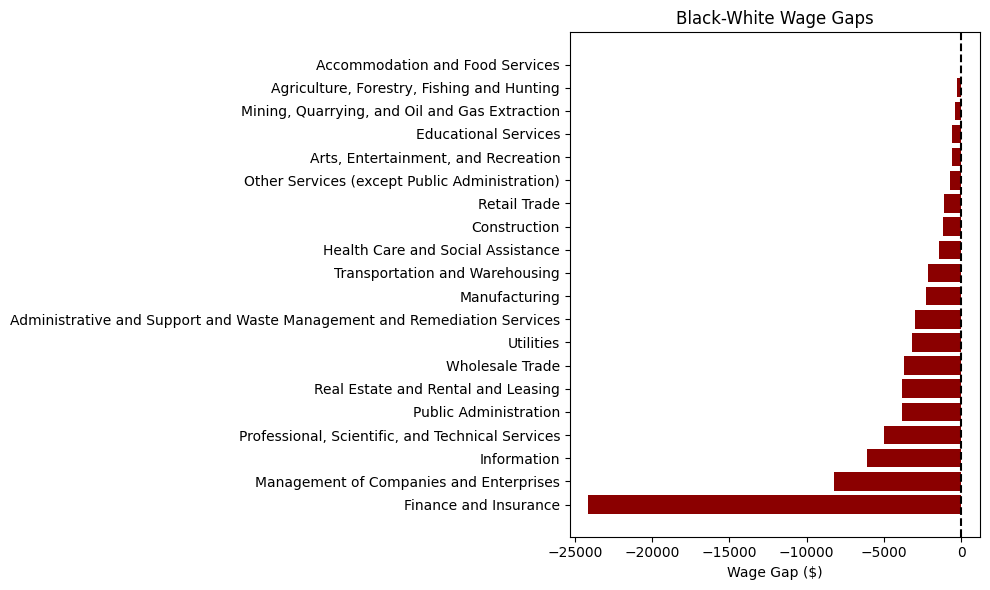

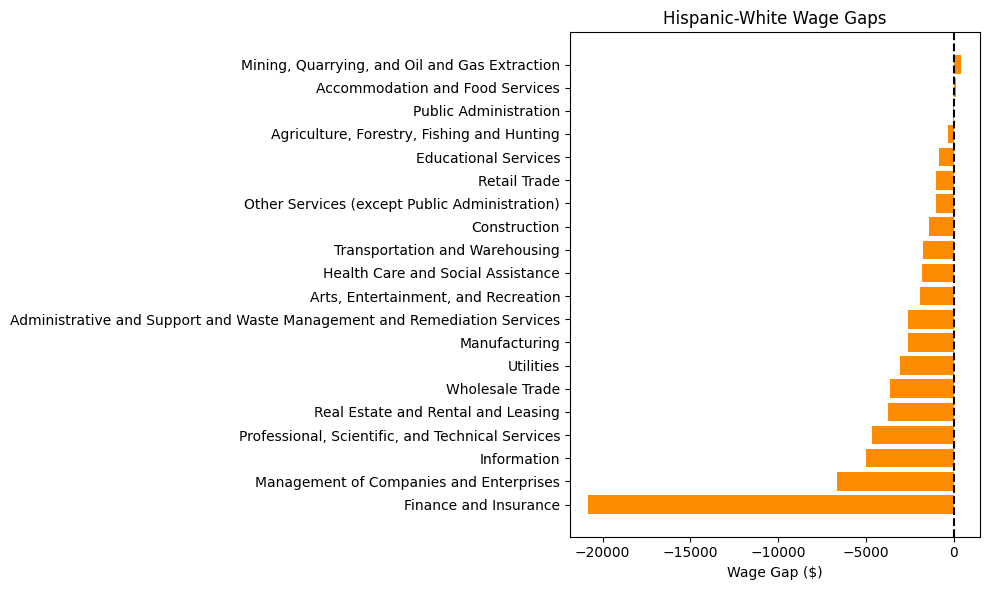

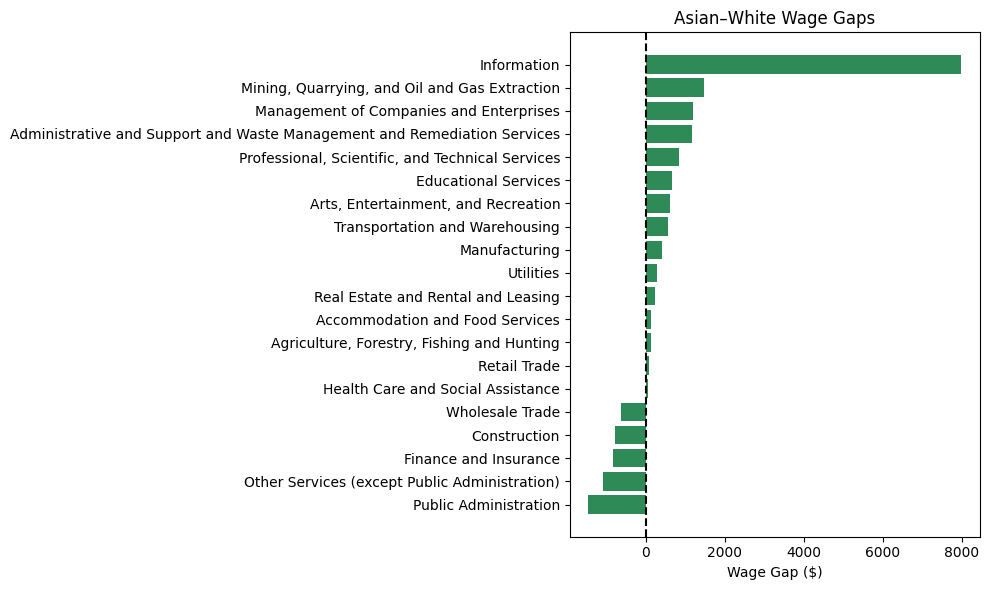

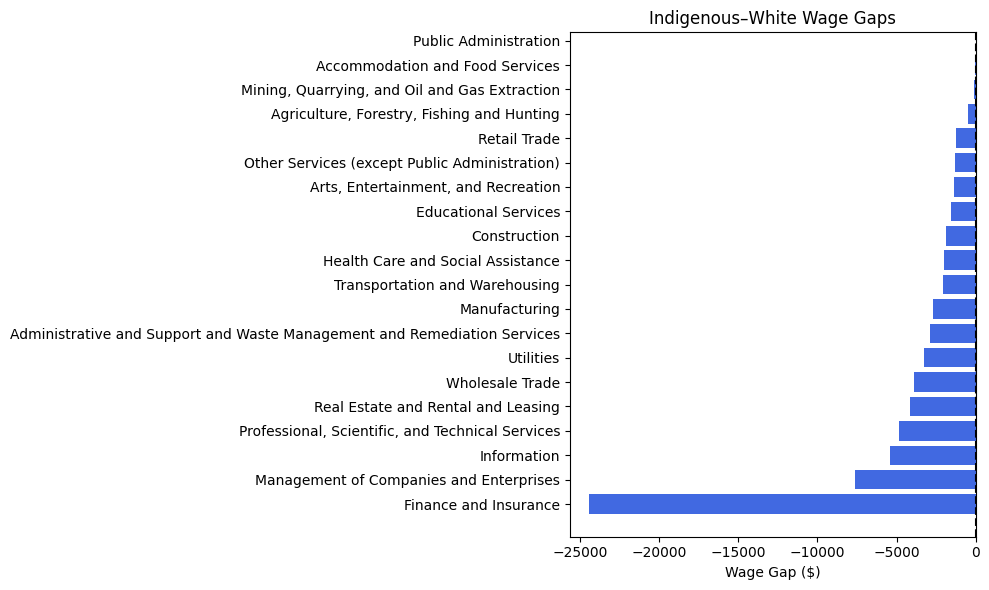

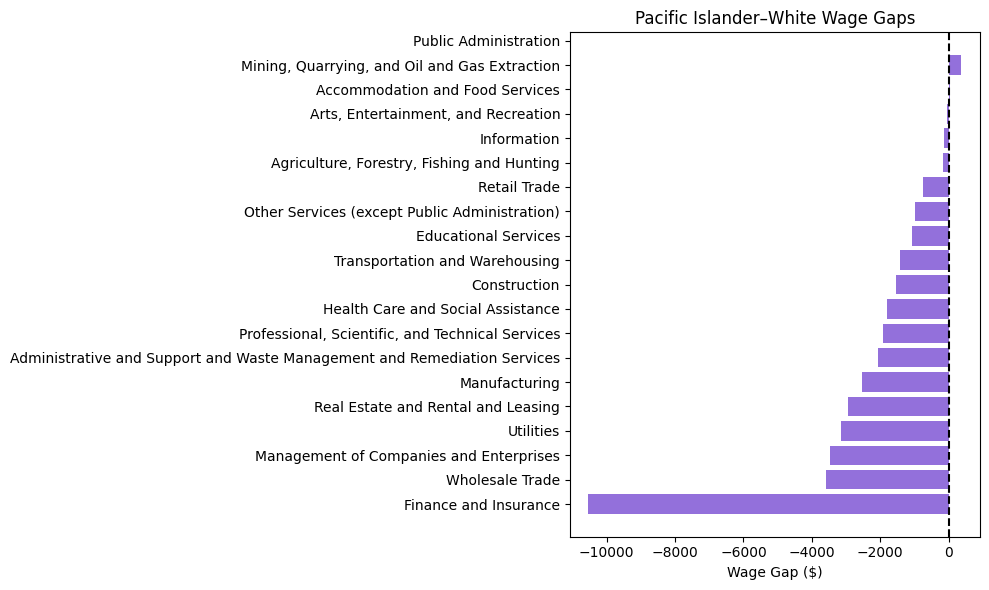

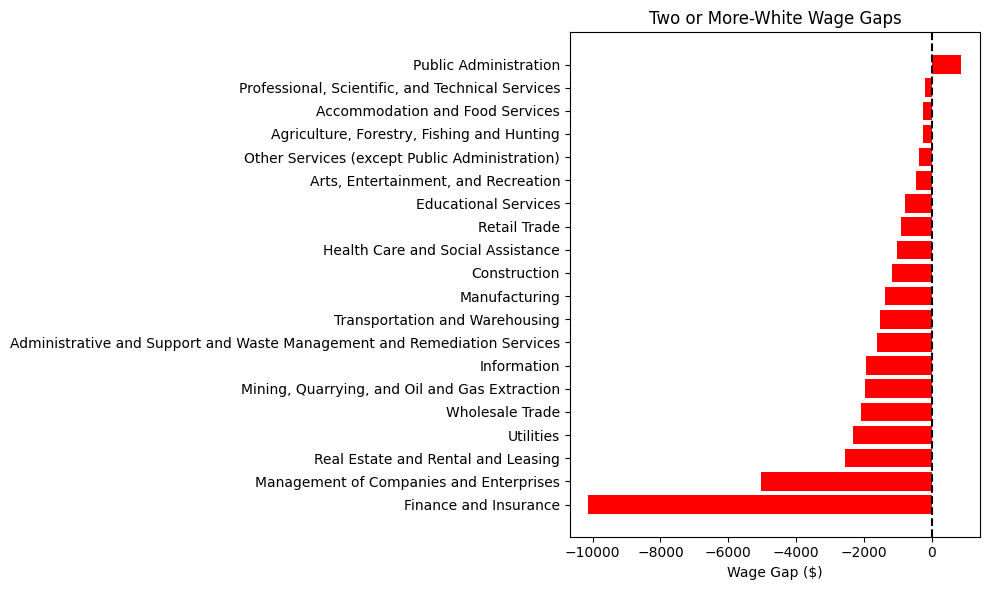

In [2]:

import pandas as pd
file_path= '/content/NAICS Sector - Wage data - Across Races.xlsx'
wage_data = pd. read_excel (file_path)
print(wage_data.columns)

# Rename the NAICS sector column
wage_data.rename(columns={'Unnamed: 0': 'NAICS Sector'}, inplace=True)

# Confirm it's renamed
print(wage_data.columns)
wage_data.head()

# Create new columns that calculate wage gaps vs. White workers
wage_data['Black_White_Gap'] = wage_data['Black or African American Alone'] - wage_data['White Alone']
wage_data['Hispanic_White_Gap'] = wage_data['Hispanic or Latino'] - wage_data['White Alone']
wage_data['Asian_White_Gap'] = wage_data['Asian Alone'] - wage_data['White Alone']
wage_data['Indigenous_White_Gap'] = wage_data['American Indian or Alaska Native Alone'] - wage_data['White Alone']
wage_data['PacificIslander_White_Gap'] = wage_data['Native Hawaiian or Other Pacific Islander Alone'] - wage_data['White Alone']
wage_data['TwoOrMore_White_Gap'] = wage_data['Two or More Race Groups'] - wage_data['White Alone']
# Check new columns
wage_data[['NAICS Sector',
           'Black_White_Gap',
           'Hispanic_White_Gap',
           'Asian_White_Gap',
           'Indigenous_White_Gap',
           'PacificIslander_White_Gap',
           'TwoOrMore_White_Gap']].head(20)


import matplotlib.pyplot as plt

# Chart: Black-White wage gap by top 10 sectors
top_black_gap = wage_data[['NAICS Sector', 'Black_White_Gap']].sort_values(by='Black_White_Gap').head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_black_gap['NAICS Sector'], top_black_gap['Black_White_Gap'], color='darkred')
plt.title('Black-White Wage Gaps')
plt.xlabel('Wage Gap ($)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

top_hispanic_gap = wage_data[['NAICS Sector', 'Hispanic_White_Gap']].sort_values(by='Hispanic_White_Gap').head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_hispanic_gap['NAICS Sector'], top_hispanic_gap['Hispanic_White_Gap'], color='darkorange')
plt.title('Hispanic-White Wage Gaps')
plt.xlabel('Wage Gap ($)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

top_asian_gap = wage_data[['NAICS Sector', 'Asian_White_Gap']].sort_values(by='Asian_White_Gap').head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_asian_gap['NAICS Sector'], top_asian_gap['Asian_White_Gap'], color='seagreen')
plt.title('Asian–White Wage Gaps')
plt.xlabel('Wage Gap ($)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

top_indigenous_gap = wage_data[['NAICS Sector', 'Indigenous_White_Gap']].sort_values(by='Indigenous_White_Gap').head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_indigenous_gap['NAICS Sector'], top_indigenous_gap['Indigenous_White_Gap'], color='royalblue')
plt.title('Indigenous–White Wage Gaps')
plt.xlabel('Wage Gap ($)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

top_pacific_gap = wage_data[['NAICS Sector', 'PacificIslander_White_Gap']].sort_values(by='PacificIslander_White_Gap').head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_pacific_gap['NAICS Sector'], top_pacific_gap['PacificIslander_White_Gap'], color='mediumpurple')
plt.title('Pacific Islander–White Wage Gaps')
plt.xlabel('Wage Gap ($)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

top_two_races_gap = wage_data[['NAICS Sector', 'TwoOrMore_White_Gap']].sort_values(by='TwoOrMore_White_Gap').head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_two_races_gap['NAICS Sector'], top_two_races_gap['TwoOrMore_White_Gap'], color='red')
plt.title('Two or More-White Wage Gaps')
plt.xlabel('Wage Gap ($)')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()



